In [6]:
# Importing the necessary libraries for analysis

# For data manipulation and analysis
import pandas as pd  

# For numerical operations
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt

# For advanced visualizations
import seaborn as sns

In [7]:
# STEP 1: Loading and Reviewing the Dataset

# loading the marketing campaign dataset
marketing_campaign_dataset = pd.read_csv(r"C:\Users\YEMISI\Downloads\marketing_data.csv.xlsx - marketing_campaign_dataset.csv")

# Checking the first few rows to know what we are working with
marketing_campaign_dataset.head(10)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,1/1/2021,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,2/1/2021,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,3/1/2021,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,4/1/2021,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,5/1/2021,379,4201,3,Health & Wellness
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,"$9,716.00",4.36,New York,6/1/2021,100,1643,1,Foodies
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,"$11,067.00",2.86,Los Angeles,7/1/2021,817,8749,10,Tech Enthusiasts
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,"$13,280.00",5.55,Los Angeles,8/1/2021,624,7854,7,Outdoor Adventurers
8,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,"$18,066.00",6.73,Chicago,9/1/2021,861,1754,6,Tech Enthusiasts
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,"$13,766.00",3.78,Los Angeles,10/1/2021,642,3856,3,Tech Enthusiasts


In [8]:
# This displays dataset structure, including column names and data types
marketing_campaign_dataset.info()

# This counts unique values in each column to detect potential categorical features
marketing_campaign_dataset.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  object 
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 22.9+ MB


Campaign_ID         200005
Company                  5
Campaign_Type            5
Target_Audience          5
Duration                 4
Channel_Used             6
Conversion_Rate         15
Acquisition_Cost     15001
ROI                    601
Location                 5
Date                   365
Clicks                 901
Impressions           9001
Engagement_Score        10
Customer_Segment         5
dtype: int64

In [9]:
# Detecting duplicate entries 

# This checks and counts duplicate rows in the dataset
print("\nDuplicate Rows:\n", marketing_campaign_dataset.duplicated().sum())


Duplicate Rows:
 0


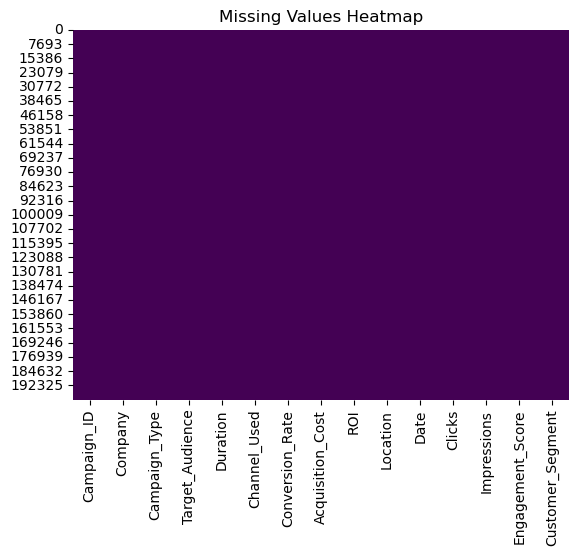

In [10]:
# Heatmap to visualize missing data; this is to ensure further I'm not missing out on any anomalies

sns.heatmap(marketing_campaign_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

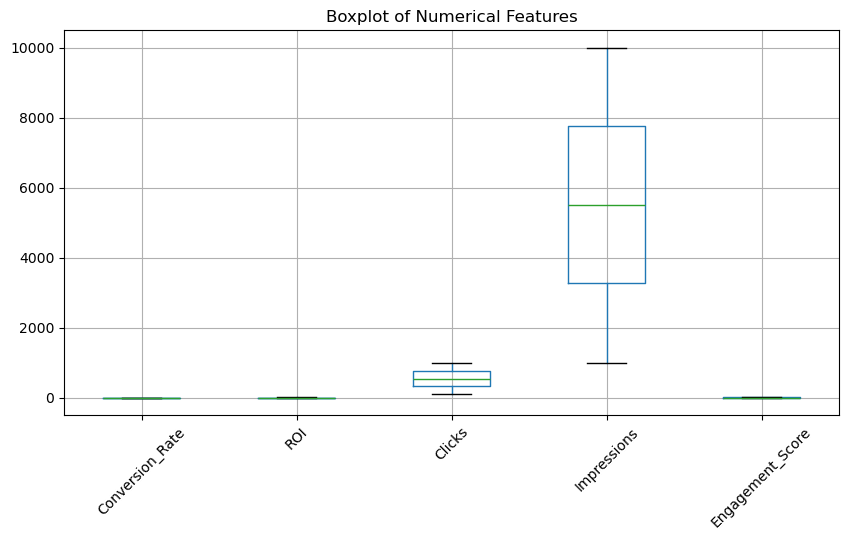

In [11]:
# Detecting Outliers in the dataset

# Visualizing Outliers detection
numerical_columns = ['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
plt.figure(figsize=(10,5))
marketing_campaign_dataset[numerical_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

In [12]:
# Calculating outliers using IQR method
Q1 = marketing_campaign_dataset[numerical_columns].quantile(0.25)
Q3 = marketing_campaign_dataset[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (marketing_campaign_dataset[numerical_columns] < lower_bound) | (marketing_campaign_dataset[numerical_columns] > upper_bound)
outliers.sum()

Conversion_Rate     0
ROI                 0
Clicks              0
Impressions         0
Engagement_Score    0
dtype: int64

In [13]:
# Converts 'Date' column to datetime, allowing automatic detection of format
marketing_campaign_dataset['Date'] = pd.to_datetime(
    marketing_campaign_dataset['Date'], errors='coerce', dayfirst=True
)

# Converts all dates to 'dd/mm/yyyy' format
marketing_campaign_dataset['Date'] = marketing_campaign_dataset['Date'].dt.strftime('%d/%m/%Y')

marketing_campaign_dataset['Date'].head()

0    01/01/2021
1    02/01/2021
2    03/01/2021
3    04/01/2021
4    05/01/2021
Name: Date, dtype: object

In [14]:
# This is to check if all values match the pattern dd/mm/yyyy
print(marketing_campaign_dataset['Date'].str.contains(r'\d{2}/\d{2}/\d{4}').all())
# Checking to see if there is any 'NaT' or 'NaN' values 
print(marketing_campaign_dataset['Date'].isna().sum())
# Checking to see if there is any mm/dd/yyyy format still existing
print(marketing_campaign_dataset[~marketing_campaign_dataset['Date'].str.match(r'\d{2}/\d{2}/\d{4}')])


True
0
Empty DataFrame
Columns: [Campaign_ID, Company, Campaign_Type, Target_Audience, Duration, Channel_Used, Conversion_Rate, Acquisition_Cost, ROI, Location, Date, Clicks, Impressions, Engagement_Score, Customer_Segment]
Index: []


In [15]:
 marketing_campaign_dataset.to_csv('marketing_campaign_dataset.csv', index=False)

In [16]:
# DATA EXPLORATION & PERFORMANCE METRICS

# This provides summary statistics for numerical columns
print("\nSummary Statistics:\n", marketing_campaign_dataset.describe())

# Summary statistics for numerical columns
print("\nBasic Statistics:\n", marketing_campaign_dataset[numerical_columns].describe())

# Unique marketing channels
print("\nUnique Marketing Channels:\n", marketing_campaign_dataset['Channel_Used'].unique())

# Unique target audiences
print("\nUnique Target Audiences:\n", marketing_campaign_dataset['Target_Audience'].unique())



Summary Statistics:
          Campaign_ID  Conversion_Rate            ROI         Clicks  \
count  200005.000000    200005.000000  200005.000000  200005.000000   
mean   100003.000000         0.080069       5.002416     549.774591   
std     57736.614632         0.040602       1.734485     260.019354   
min         1.000000         0.010000       2.000000     100.000000   
25%     50002.000000         0.050000       3.500000     325.000000   
50%    100003.000000         0.080000       5.010000     550.000000   
75%    150004.000000         0.120000       6.510000     775.000000   
max    200005.000000         0.150000       8.000000    1000.000000   

         Impressions  Engagement_Score  
count  200005.000000     200005.000000  
mean     5507.307107          5.494673  
std      2596.863794          2.872593  
min      1000.000000          1.000000  
25%      3266.000000          3.000000  
50%      5518.000000          5.000000  
75%      7753.000000          8.000000  
max     10

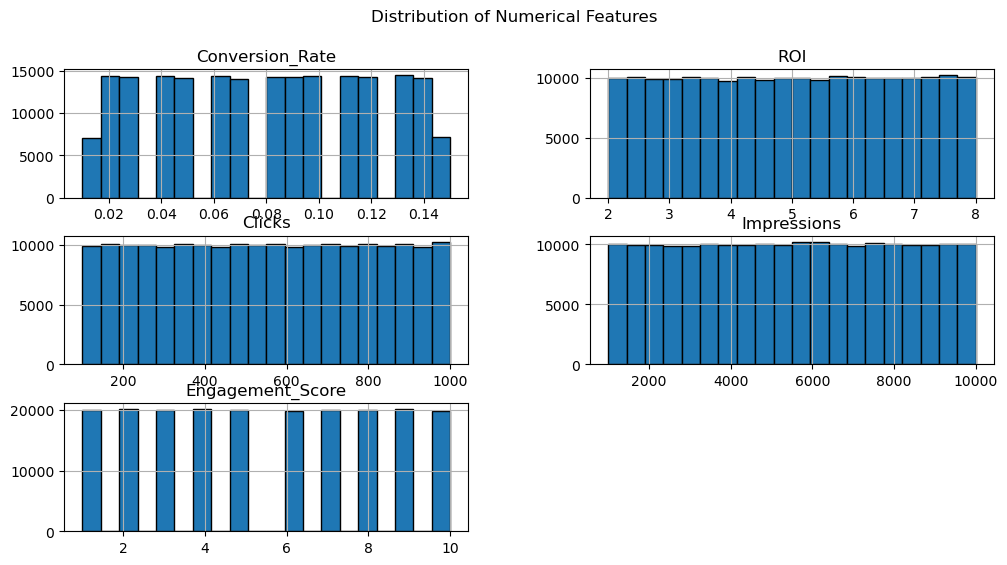

In [17]:
# Histograms for key metrics
marketing_campaign_dataset[numerical_columns].hist(figsize=(12,6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

Insights Generation

In [19]:
# Calculating CTR, CPC that will also be used to access campaign effectiveness

# Clicks, Impressions, Acquisition_Cost are converted into numeric to avoid errors as this will be used in calculating CPC and CTR
# CTR: Click-Through Rate = Clicks / Impressions * 100
# CPC: Cost Per Click = Acquisition_Cost / Clicks

# Ensure numeric conversion
marketing_campaign_dataset['Acquisition_Cost'] = (
    marketing_campaign_dataset['Acquisition_Cost']
    .replace(r'[$,]', '', regex=True)  # Remove $ and commas
    .astype(float)
)

marketing_campaign_dataset['Clicks'] = pd.to_numeric(marketing_campaign_dataset['Clicks'], errors='coerce')
marketing_campaign_dataset['Impressions'] = pd.to_numeric(marketing_campaign_dataset['Impressions'], errors='coerce')

# Calculate CTR (Click-Through rate)
marketing_campaign_dataset['CTR'] = (marketing_campaign_dataset['Clicks'] / marketing_campaign_dataset['Impressions']) * 100

# Calculate CPC (Cost Per Click)
marketing_campaign_dataset['CPC'] = marketing_campaign_dataset['Acquisition_Cost'] / marketing_campaign_dataset['Clicks']

# Handle Division by Zero or Missing Values
marketing_campaign_dataset.replace([float('inf'), float('-inf')], 0, inplace=True)
marketing_campaign_dataset.fillna(0, inplace=True)

# Display Results
print(marketing_campaign_dataset[['Campaign_ID', 'Acquisition_Cost', 'Clicks', 'Impressions', 'CTR', 'CPC']].head())

marketing_campaign_dataset.to_csv("updated_campaign_data.csv", index=False)

   Campaign_ID  Acquisition_Cost  Clicks  Impressions        CTR        CPC
0            1           16174.0     506         1922  26.326743  31.964427
1            2           11566.0     116         7523   1.541938  99.706897
2            3           10200.0     584         7698   7.586386  17.465753
3            4           12724.0     217         1820  11.923077  58.635945
4            5           16452.0     379         4201   9.021662  43.408971


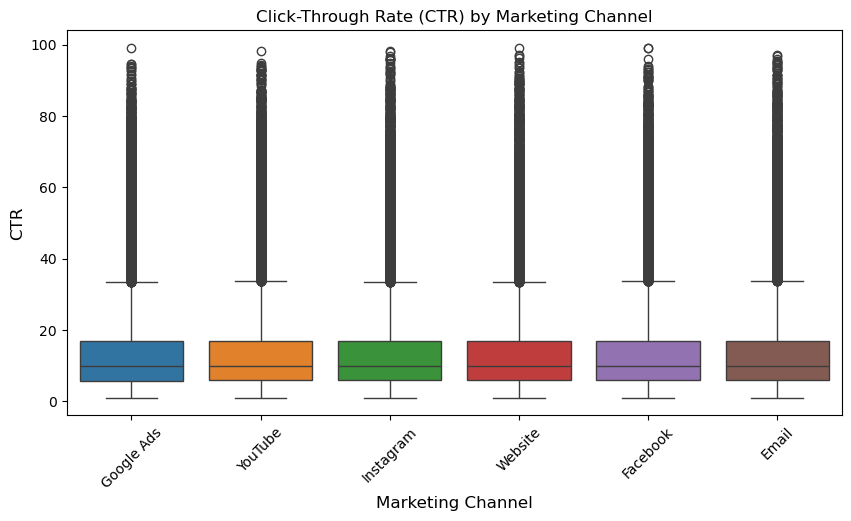

In [20]:
# CLICK THROUGH RATE (CTR) 
# Calculating CTR to access campaign effectiveness
# CTR = (Clicks / Impressions) * 100

marketing_campaign_dataset['CTR'] = (marketing_campaign_dataset['Clicks'] / marketing_campaign_dataset['Impressions']) * 100

# Visualize CTR across channels
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Channel_Used', y='CTR', data=marketing_campaign_dataset, hue= 'Channel_Used', dodge=False)
plt.xticks(rotation=45)
plt.title("Click-Through Rate (CTR) by Marketing Channel")
plt.xlabel("Marketing Channel", fontsize=12)
plt.ylabel("CTR", fontsize=12)
plt.show()

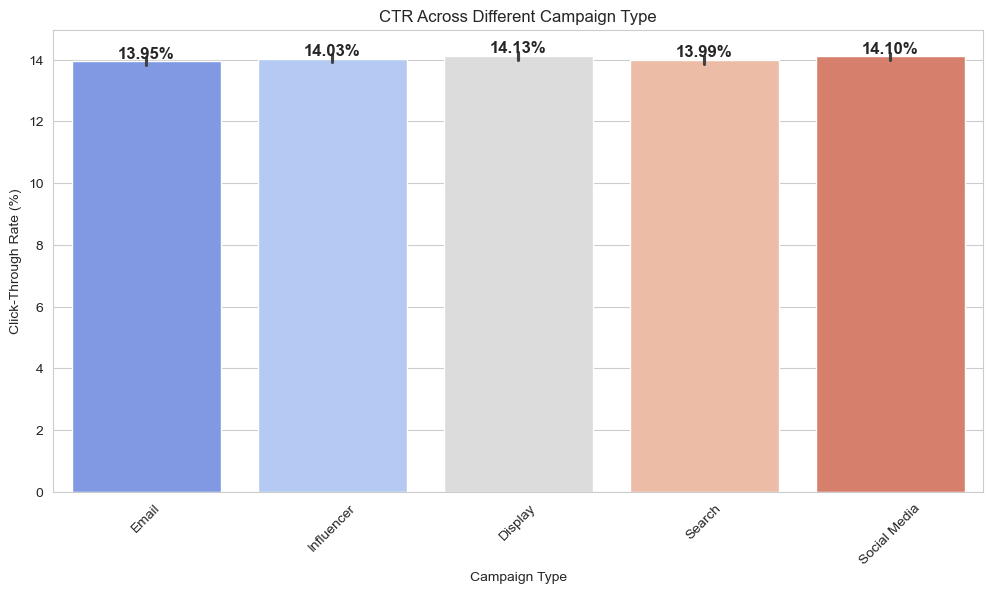

In [21]:
# CTR (Click-Through Rates) Distribution Across Campaigns

# Identifying which Campaign_Type has the best Click-Through Rates (CTR)
# Campaigns with low CTR might have ineffective ad copy, targeting, or placement

# Set plot style
sns.set_style("whitegrid")

# Bar Plot of CTR by Campaign
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Campaign_Type', y="CTR", data=marketing_campaign_dataset, hue='Campaign_Type', legend=False, palette="coolwarm")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.title("CTR Across Different Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Click-Through Rate (%)")
plt.show()

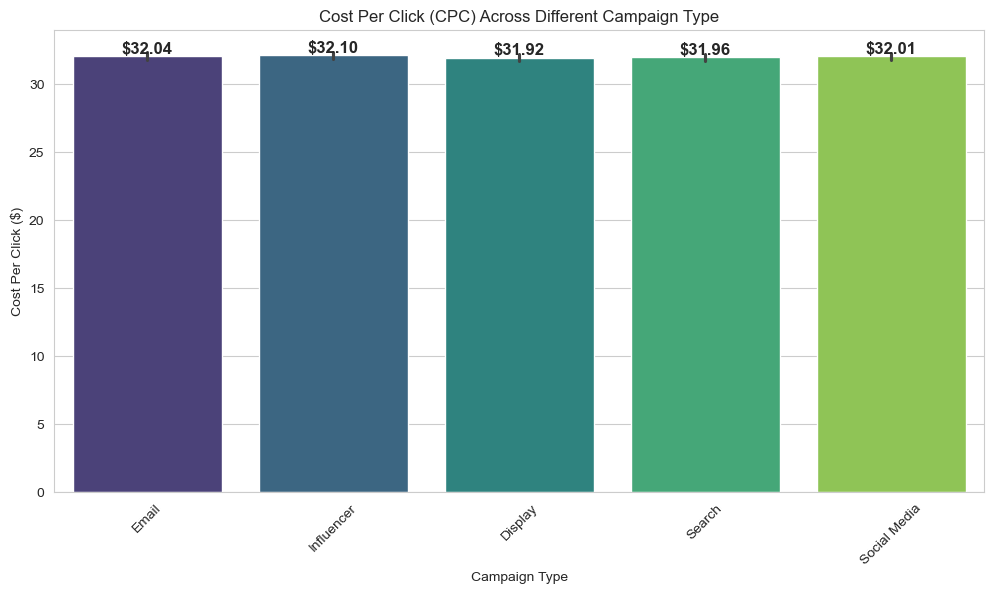

In [22]:
# CPC (Cost Per Click) Distribution Across Campaigns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Campaign_Type', y='CPC', data=marketing_campaign_dataset, hue='Campaign_Type', legend=False, palette="viridis")

# Add value labels
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.title("Cost Per Click (CPC) Across Different Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Cost Per Click ($)")
plt.show()

      Location       ROI
3        Miami  5.012282
2  Los Angeles  5.010876
1      Houston  5.007174
0      Chicago  5.001555
4     New York  4.980185


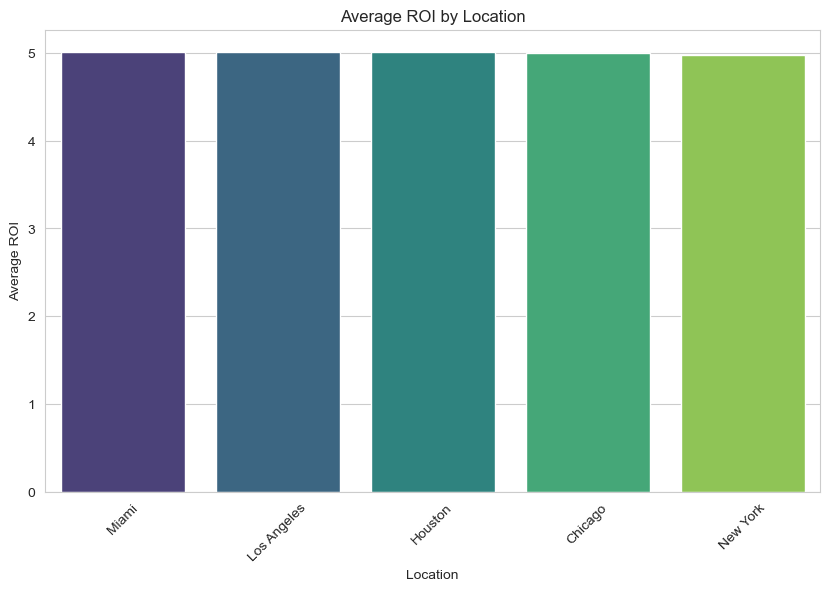

In [23]:
# EXTRACTING INSIGHTS & TRENDS

# Location By ROI: this is to explore Location-based trends to uncover demographic or cultural influences on campaign success

# Group by location and calculate the average ROI
location_roi = marketing_campaign_dataset.groupby('Location')['ROI'].mean().reset_index()

# Sort values from highest to lowest for better visualization
location_roi = location_roi.sort_values(by='ROI', ascending=False)

# Display the table
print(location_roi)

# Set figure size
plt.figure(figsize=(10,6))

# Creates a bar plot
sns.barplot(data=location_roi, x='Location', y='ROI', hue='Location', dodge=False, legend=False, palette='viridis')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Average ROI')
plt.title('Average ROI by Location')
plt.xticks(rotation=45)  # Rotate labels for readability

# Show plot
plt.show()

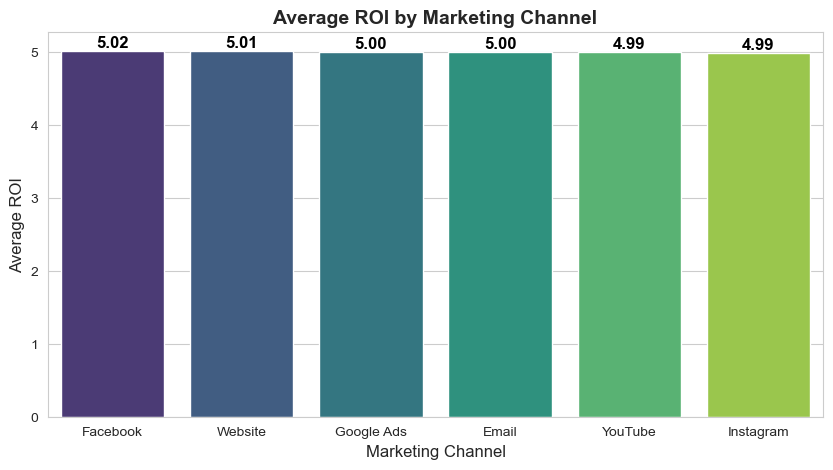

In [24]:
#  Marketing Channel Effectiveness

# This is to determine which marketing channels delivered the best results

# Grouping by marketing channels
channel_performance = marketing_campaign_dataset.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=channel_performance.index, y=channel_performance.values, palette="viridis", hue=channel_performance.index, legend=False)

# Add average ROI values to display on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  # Format value to 2 decimal places
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position the text
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
plt.title("Average ROI by Marketing Channel", fontsize=14, fontweight='bold')
plt.xlabel("Marketing Channel", fontsize=12)
plt.ylabel("Average ROI", fontsize=12)
plt.show()

In [25]:
# Top 5 high-performing campaigns based on ROI
high_roi = marketing_campaign_dataset[['Campaign_Type', 'Company', 'ROI']].sort_values(by='ROI', ascending=False).head(5)
high_roi

,Campaign_Type,Company,ROI
182656,Search,Alpha Innovations,8.0
83445,Search,Alpha Innovations,8.0
73036,Email,NexGen Systems,8.0
140372,Influencer,DataTech Solutions,8.0
104050,Display,Alpha Innovations,8.0


In [26]:
# Bottom 5 low-performing campaigns based on ROI
low_roi = marketing_campaign_dataset[['Campaign_Type', 'Company', 'ROI']].sort_values(by='ROI', ascending=True).head(5)
low_roi


,Campaign_Type,Company,ROI
153591,Email,DataTech Solutions,2.0
79336,Search,TechCorp,2.0
117384,Email,NexGen Systems,2.0
175913,Social Media,DataTech Solutions,2.0
165094,Email,DataTech Solutions,2.0


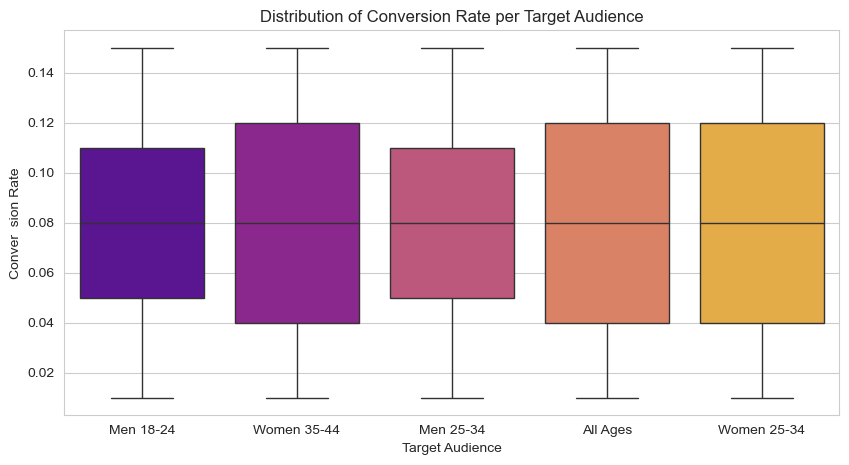

In [27]:
# Grouping by target audience
audience_performance = marketing_campaign_dataset.groupby('Target_Audience')['Conversion_Rate'].mean()
# Visualizing Conversion Rate per Target Audience
plt.figure(figsize=(10,5))
sns.boxplot(x=marketing_campaign_dataset['Target_Audience'], y=marketing_campaign_dataset['Conversion_Rate'], hue=marketing_campaign_dataset['Target_Audience'], dodge=False, legend=False, palette='plasma')
plt.xlabel('Target Audience')
plt.ylabel('Conver  sion Rate')
plt.title('Distribution of Conversion Rate per Target Audience')
plt.show()

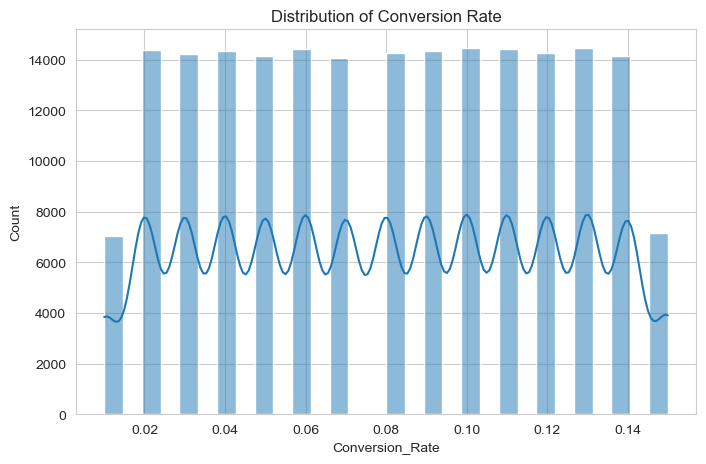

In [28]:
# Distribution of Conversion Rate
plt.figure(figsize=(8,5))
sns.histplot(marketing_campaign_dataset['Conversion_Rate'], bins=30, kde=True)
plt.title('Distribution of Conversion Rate')
plt.show()

Location
Miami          5.012282
Los Angeles    5.010876
Houston        5.007174
Chicago        5.001555
New York       4.980185
Name: ROI, dtype: float64


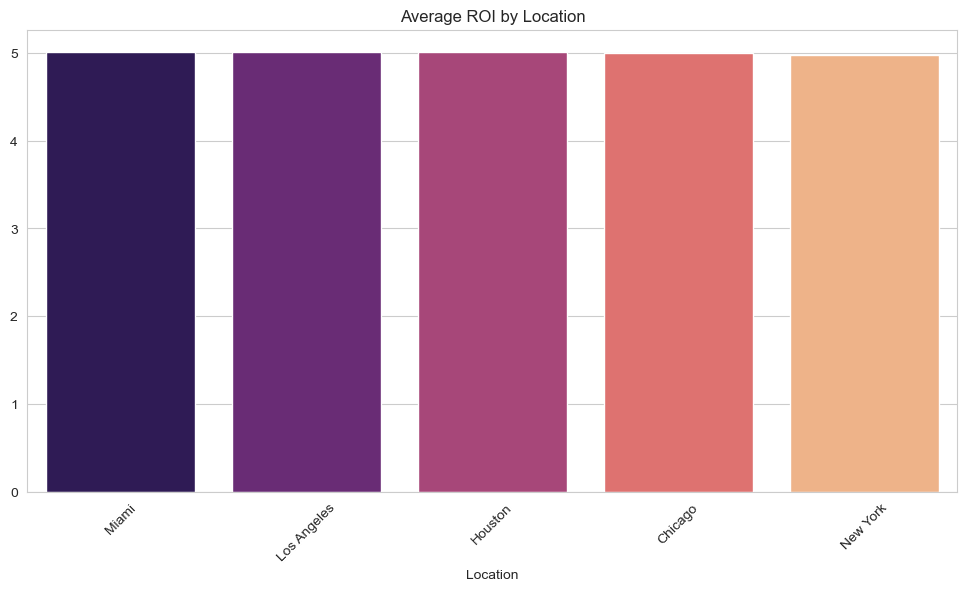

In [29]:
# ROI by location
location_performance = marketing_campaign_dataset.groupby('Location')['ROI'].mean().sort_values(ascending=False)
print(location_performance)

plt.figure(figsize=(12,6))
sns.barplot(x=location_performance.index, y=location_performance.values, hue=location_performance.index, legend=False, palette="magma")
plt.xticks(rotation=45)
plt.title("Average ROI by Location")
plt.show()

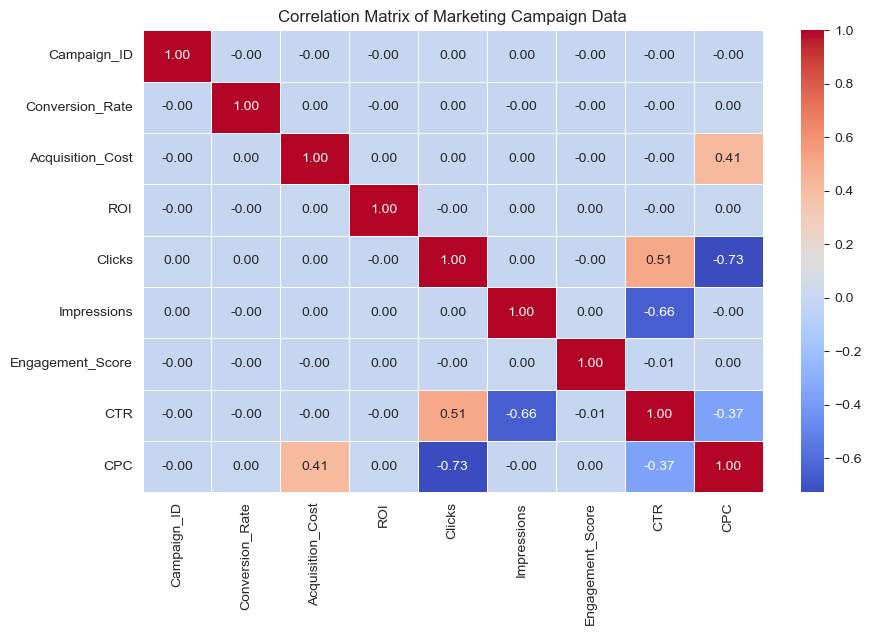

In [30]:
# Correlation matrix of Marketing Campaign Data

# Select only numeric columns
numeric_data = marketing_campaign_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Marketing Campaign Data")
plt.show()